# Assignmnet 1
## Model Selection (Part 1)

In [92]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
matr = []
Y = []

In [44]:
# Read the data 
data = pd.read_csv("Datasets/Dataset_1_train.csv", header = -1,usecols=range(2))
cols = ["x","y"]
data.columns = cols
data.head()


,x,y
0,0.516220,1.609671
1,0.850085,14.814006
2,-0.840629,-8.738649
3,0.227433,-0.274344
4,-0.649508,-8.683412


In [45]:
x = data['x']
y = data['y']

In [46]:
plt.scatter(x,y)

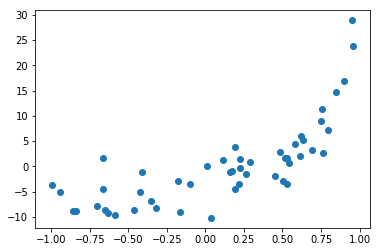

In [47]:
plt.show()

In [48]:
matr = []
for a in x:
    row =[]
    for p in range(20,-1,-1): 
        row = row + [a**(p)]
    matr = matr + [row]  

In [49]:
#Initialization for X, X^T and Y.
Y=[]
for i in y:
    Y = Y +[[i]]
    
X = np.array(matr) 
XT = X.transpose() 

### $$ W^* = (X^TX)^{-1}X^TY$$

### Using the formula we derived from class, we get the following parameters for the polynomial

In [51]:
# Get the parameters
A = np.dot(XT,X)
A1 = np.matrix(A)
A_I = A1.I
XTX = np.dot(A_I,XT)
W = np.dot(XTX,Y)
# Get the Transpose because its easier to use as a row vector
WT = W.transpose()
print("The polynomial coefficients are:")
print(WT)
# flatten the list.
p = WT.tolist()[0]
# Define the polynomial
Poly = np.poly1d(p)


The polynomial coefficients are:
[[ -2.00505258e+06   4.23312419e+05   9.08050592e+06  -2.08514474e+06
   -1.73694623e+07   4.28762157e+06   1.82475060e+07  -4.78970342e+06
   -1.14608154e+07   3.16229062e+06   4.38942640e+06  -1.25484346e+06
   -1.00186949e+06   2.90183572e+05   1.27183831e+05  -3.57491027e+04
   -7.74437812e+03   1.91012644e+03   1.55802528e+02  -1.55057617e+01
   -3.90624607e+00]]
Comparing the answer with numpy.polyfit
[ -2.00438306e+06   4.22697493e+05   9.07759174e+06  -2.08243121e+06
  -1.73641577e+07   4.28259629e+06   1.82422715e+07  -4.78462777e+06
  -1.14577838e+07   3.15925024e+06   4.38838678e+06  -1.25374406e+06
  -1.00166864e+06   2.89950110e+05   1.27165132e+05  -3.57222246e+04
  -7.74398741e+03   1.90871415e+03   1.55838699e+02  -1.54838532e+01
  -3.90688268e+00]


### Get the new Y values

In [79]:
X = np.arange(-1,0.98, 0.001)

# get the new y
new_y = [Poly(i) for i in x ]
# get the new y for sorted x.
plt_y = [Poly(i) for i in X ]

## Calculate The training MSE

In [80]:
sigma = 0
for i in range(len(new_y)):
    sigma = sigma + (new_y[i] - y[i])**2 
print("The Training mean square error is:",sigma/len(y))

The Training mean square error is: 6.47474592081


### Read the Validation data 

In [81]:
valid = pd.read_csv("Datasets/Dataset_1_valid.csv",header=-1,usecols=range(2))
cols = ["x","y"]
valid.columns = cols
#data.head()
u = valid['x']
v = valid['y']

## calculate the validation MSE

In [82]:
new_v = [Poly(i) for i in u ]
sigma = 0
for i in range(len(new_v)):
    sigma = sigma + (new_v[i] - v[i])**2 
print("The validation mean square error is:",sigma/len(v))

The validation mean square error is: 1418.50796451


#### Curve Fit with Training data 

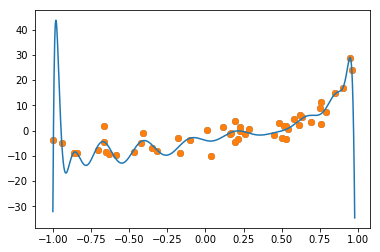

In [84]:
plt.scatter(x,y)
plt.plot(X,plt_y)
plt.show()

 # TEST CURVE FIT

In [68]:
test = pd.read_csv("Datasets/Dataset_1_test.csv", header = -1,usecols=range(2))
cols = ["x","y"]
test.columns = cols
test.head() 

,x,y
0,-0.335254,-2.953401
1,0.122457,-5.836786
2,-0.819361,-9.321124
3,-0.860443,-3.800950
4,0.422628,2.100318


##### Get the test values and plot it

In [77]:
X = np.arange(-1,0.985, 0.001 )
Y = [Poly(i) for i in X ]

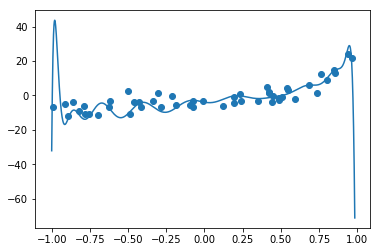

In [78]:
plt.plot(X,Y)
plt.scatter(test['x'],test['y'])
plt.show()

# Model Selection (Part 2)

In [99]:
w2 = np.linalg.norm(WT)**2

In [100]:
minimum = sys.maxsize
val = 0

In [ ]:
sigma = 0
for i in range(len(new_y)):
    sigma = sigma + (new_y[i] - y[i])**2 
print(sigma)

In [ ]:
lamda = 0.01
while(lamda <= 1):
    if (sigma/2 + lamda*w2/2) < minimum:
        minimum = sigma/2 + lamda*w2**2/2
        val = lamda
    lamda = lamda + 0.01

In [ ]:
print(lamda)